In [1]:
#Marc Mekhanik 260762445 Math 578 Lab 3
#standard imports
import math
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.debugger import set_trace

## Standing Problems
Currently, there are problems with BE and I have not been able to implement the vector case. However I will be submitting this now, and I will try and fix these problems in the remaining time.

## Question 1
Implement forward and backward Euler methods (for vector valued functions), where
the backward Euler code uses Newton's iteration as a nonlinear solver. In each step of
the backward Euler, start the Newton iteration with the initial guess given by a step of
the forward Euler method, and stop the Newton iteration when the distance between
two successive iterates falls within some specified tolerance (e.g., equal to $10^{-6}$).

The Forward Euler (FE) method is given by 
$$ u_{n+1} = u_n + hf(u_n) $$
where $f(u) = u'$ and $h$ is a step size. Backward Euler (BE) is given by
$$ u_{n+1} = u_n + hf(u_{n+1}) $$
We will solve the implicit equation using Newton Iteration, i.e.
$$ u_{n+1} = u_n - \frac{f(u_n)}{f'(u_n)} $$

In [31]:
def FE(initial_guess,f,lbd,h,t,verbose=False):
    nmax = int(t/h)
    results = np.zeros(nmax)
    #f should be your ODE, h is step size
    # to ensure this works for vector values, the ode f should be vectorized
    results[0] = initial_guess
    # stopping condition in case convergence fails
    # FE not A-stable so very possible
    # we want nh = t
    for i in range(1,nmax):
        results[i] = results[i-1] + h*f(results[i-1],lbd)
    if verbose:
        return results
    return (results[-1],nmax)

def newt_it(starting_point,f,df,lbd):
    x0 = starting_point
    x1 = x0 + f(x0,lbd)/df(x0,lbd)
    n = 1
    # setting max iterations just as a safety. This method is stable so I shouldn't need it
    while (np.abs(x1 - x0) > 10e-06) and (n < 500):
        x0 = x1
        x1 = x0 - f(x0,lbd)/df(x0,lbd)
        n += 1
    return (x1,n)

def BE(initial_guess,f,df,lbd,h,t,verbose=False):
    # I wil focus on this later, but I think I can adjust this to vector value by setting results to be m, nmax dimensional
    # when initial guess is m dimensional.
    nmax = int(t/h)
    results = np.zeros(nmax)
    results[0] = initial_guess
    # newton iteration should be made general but we will see
    num_of_f_evals = 0
    for i in range(nmax):
        (approx_x1,n) = newt_it(results[0],f,df,lbd)
        results[i] = results[i-1] + h*f(approx_x1,lbd)
        num_of_f_evals = num_of_f_evals + 1 + n
    if verbose:
        return results
    return (results[-1],num_of_f_evals)


## Question 2
Conside the model problem $y' = \lambda y, y(0) = 1$ for (i) $\lambda = -23$, (ii) $\lambda = 1$ and (iii)
$$ y' = \begin{bmatrix}
-1 & 0 \\
0 & -100
\end{bmatrix}y \quad y(0) = \begin{bmatrix} 1 \\ 1 \end{bmatrix} $$
We will be interested in the step sizes $h = 0.1, 0.05, 0.02, 0.01, 0.005, \dots$

### 2.a,2.b
Plot a graph of $log ||y(tn) - yn||$ against $logh$, at the fixed time $t = 2$ where $n$
satisfies $nh = 2$, that is we are computing many numerical solutions, each for a
different fixed step-size $h$, for $t \in [0, 2]$ and comparing the error between the exact
and numerical solution at the final time as a function of $h$. Explain the results.

C:\Users\donte\Anaconda3\lib\site-packages\ipykernel_launcher.py:58: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


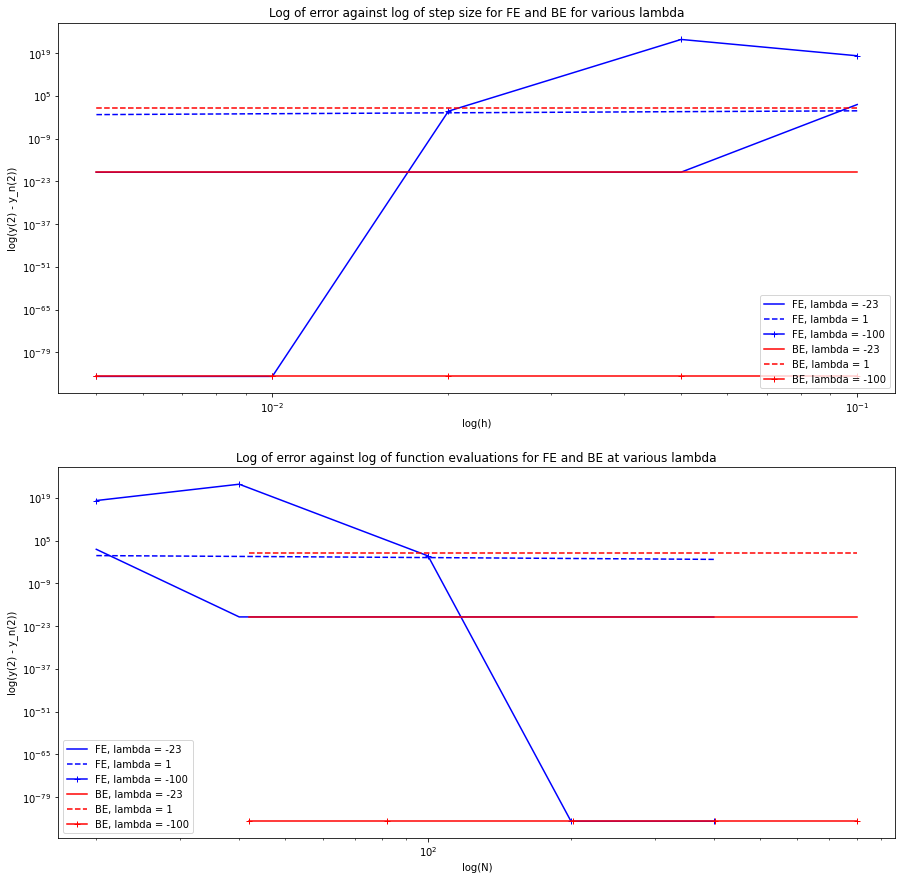

In [9]:
#first consider simple case lam = -23, (lambda is a keyword in Python so we won't use it)
def f(x,lbd):
    return lbd*x

def df(x,lbd):
    return lbd
# we need to solve up to t = 2
# and plot their iterates
#since y(0) = 1 our initial guess is 1

# ok first test
# let's try h =0.1

fig,(ax1,ax2) = plt.subplots(2,figsize=(15,15))
h_list = np.array([0.1,0.05,0.02,0.01,0.005])
#2d case to be figured out later
lbd_list = np.array([-23,1,-100])
# true solution of ode is y = e^{lbd*x}
# so y(2) = e^{lbd*2}
method_error_fe = np.zeros((3,5))
method_error_be = np.zeros((3,5))
fe_list_evals = np.zeros((3,5))
be_list_evals = np.zeros((3,5))

for i in range(len(lbd_list)):
    true_value = np.exp(lbd_list[i]*2)
    for j in range(len(h_list)):
        (method_value,num_of_f_evals_fe) = FE(1,f,lbd_list[i],h_list[j],2)
        (method_value_be, num_of_f_evals_be) = BE(1,f,df,lbd_list[i],h_list[j],2)
        method_error_fe[i][j] = np.abs(true_value - method_value)
        method_error_be[i][j] = np.abs(true_value - method_value_be)
        
        fe_list_evals[i][j] = num_of_f_evals_fe
        be_list_evals[i][j] = num_of_f_evals_be
        
ax1.loglog(h_list,method_error_fe[0][:], 'b-',label="FE, lambda = -23")
ax1.loglog(h_list,method_error_fe[1][:],'b--' ,label="FE, lambda = 1")
ax1.loglog(h_list,method_error_fe[2][:],'b+-' ,label="FE, lambda = -100")
ax1.loglog(h_list,method_error_be[0][:], 'r-',label="BE, lambda = -23")
ax1.loglog(h_list,method_error_be[1][:],'r--' ,label="BE, lambda = 1")
ax1.loglog(h_list,method_error_be[2][:],'r+-' ,label="BE, lambda = -100")
ax1.set_xlabel("log(h)")
ax1.set_ylabel("log(y(2) - y_n(2))")
ax1.set_title("Log of error against log of step size for FE and BE for various lambda")
ax1.legend()


ax2.loglog(fe_list_evals[0][:],method_error_fe[0][:], 'b-',label="FE, lambda = -23")
ax2.loglog(fe_list_evals[1][:],method_error_fe[1][:], 'b--',label="FE, lambda = 1")
ax2.loglog(fe_list_evals[2][:],method_error_fe[2][:],'b+-' ,label="FE, lambda = -100")
ax2.loglog(be_list_evals[0][:],method_error_be[0][:], 'r-',label="BE, lambda = -23")
ax2.loglog(be_list_evals[1][:],method_error_be[1][:],'r--' ,label="BE, lambda = 1")
ax2.loglog(be_list_evals[2][:],method_error_be[2][:],'r+-' ,label="BE, lambda = -100")
ax2.set_ylabel("log(y(2) - y_n(2))")
ax2.set_xlabel("log(N)")
ax2.set_title("Log of error against log of function evaluations for FE and BE at various lambda")
ax2.legend()

We see better performance regardless of step-size in BE, whereas we need to greatly decrease the step size to get better performance for the FE. Also, from the second plot we can see that while we do have a higher threshold of function evaluations to perform BE, once we hit that threshold we have reliable error bounds, while for FE we must take more and more evaluations to reduce error. 

## 2.c
Evaluate over a long time interval, compare methods.

Text(0.5, 1.0, 'Superimposed solutions of true values, FE, BE for h=0.02')

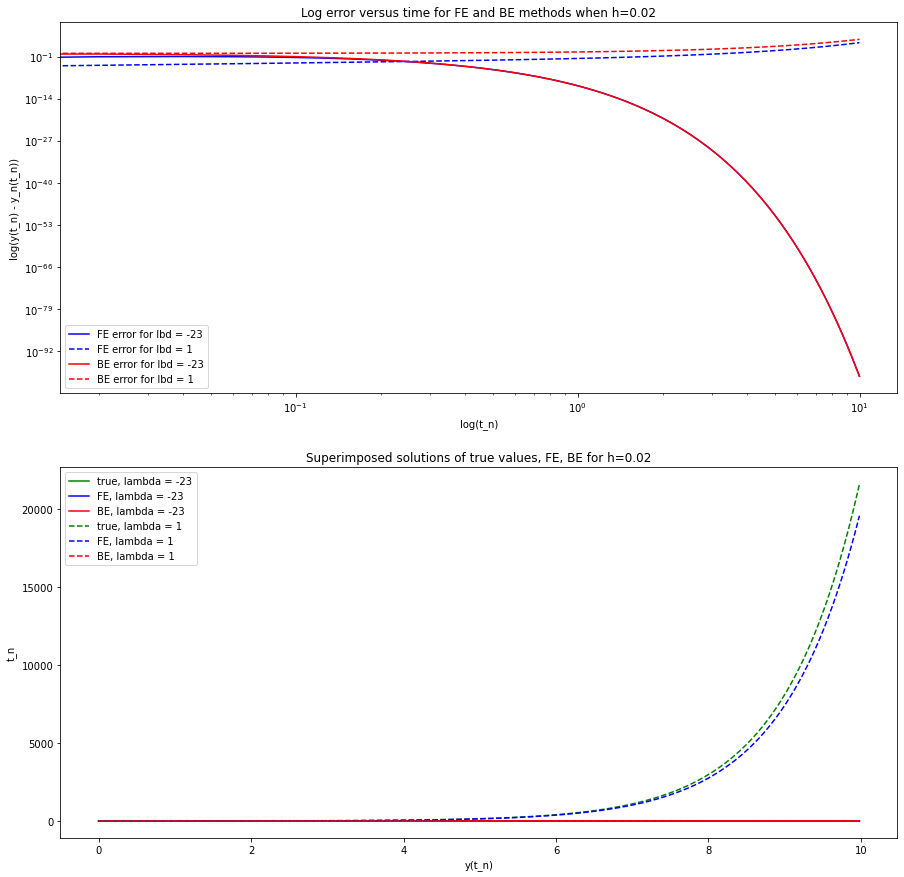

In [8]:
# k so I can actually pick a long time and fix a step size and get a whole array of input at each step.
# and just export for verbosity
# as a starting guess I am going to pick 10 seconds
# and let's fix the step size to h = 0.02, which should give decent performance
# true solution is e^(lbd*x)
# and since np.exp is vectorized this should actually be very easy.
time_steps = np.arange(0,10,0.02)
#array hellscape
fe_error_list = np.zeros((2,len(time_steps)))
be_error_list = np.zeros((2,len(time_steps)))
true_values = np.zeros((2,len(time_steps)))
be_error_list = np.zeros((2,len(time_steps)))
fe_values = np.zeros((2,len(time_steps)))
be_values = np.zeros((2,len(time_steps)))

for i in range(2):
    true_values[i][:] = np.exp(lbd_list[i]*time_steps)
    fe_values[i][:] = FE(1,f,lbd_list[i],0.02,10,verbose=True)
    be_values[i][:] = BE(1,f,df,lbd_list[i],0.02,10,verbose=True)
    fe_error_list[i][:] = np.abs(true_values[i][:] - fe_values[i][:])
    be_error_list[i][:] = np.abs(true_values[i][:] - be_values[i][:])
    
(fig,(ax1,ax2)) = plt.subplots(2,figsize=(15,15))
ax1.loglog(time_steps,fe_error_list[0][:],'b-',label="FE error for lbd = -23")
ax1.loglog(time_steps,fe_error_list[1][:],'b--',label="FE error for lbd = 1")
ax1.loglog(time_steps,be_error_list[0][:],'r-',label="BE error for lbd = -23")
ax1.loglog(time_steps,be_error_list[1][:],'r--',label="BE error for lbd = 1")

ax1.set_xlabel("log(t_n)")
ax1.set_ylabel("log(y(t_n) - y_n(t_n))")
ax1.legend()
ax1.set_title("Log error versus time for FE and BE methods when h=0.02")

#superimposed solutions
ax2.plot(time_steps,true_values[0][:],'g-',label='true, lambda = -23')
ax2.plot(time_steps,fe_values[0][:],'b-',label="FE, lambda = -23")
ax2.plot(time_steps,be_values[0][:],'r-',label="BE, lambda = -23")
ax2.plot(time_steps,true_values[1][:],'g--',label='true, lambda = 1')
ax2.plot(time_steps,fe_values[1][:],'b--',label="FE, lambda = 1")
ax2.plot(time_steps,be_values[1][:],'r--',label="BE, lambda = 1")
ax2.set_xlabel("y(t_n)")
ax2.set_ylabel("t_n")
ax2.legend()
ax2.set_title("Superimposed solutions of true values, FE, BE for h=0.02")

We note that FE becomes extremely unstable for $\lambda = 1$, which is unsuprising. We are also not surprised by the overall superior performance of BE.

## Question 3
Implement 2-stage and 4-stage Runge-Kutta, and repeat a-c above.

In [17]:
#this is a bit different because our f of interest is autonomous
# so this isn't in full generality.
def rk2(initial_guess,f,lbd,h,t,verbose=False):
    nmax = int(t/h)
    results = np.zeros(nmax)
    results[0] = initial_guess
    for i in range(1,nmax):
        results[i] = results[i-1] + h*f(results[i-1]+(h/2)*f(results[i-1],lbd),lbd)
    if verbose:
        return results
    # each step involves 2 function evals
    return (results[-1],2*nmax)

def rk4(initial_guess,f,lbd,h,t,verbose=False):
    nmax = int(t/h)
    results = np.zeros(nmax)
    results[0] = initial_guess
    # time steps have been exlcuded since the model problem is autonomous
    for i in range(1,nmax):
        stage1 = f(results[i-1]+(h/2)*f(results[i-1],lbd),lbd)
        stage2 = f(results[i-1] + (h/2)*stage1,lbd)
        stage3 = f(results[i-1] + (h/2)*stage2,lbd)
        stage4 = f(results[i-1] + h*stage3,lbd)
        results[i] = results[i-1]+ h*(stage1/6 + stage2/3 + stage3/3 + stage4/6)
    if verbose:
        return results
    # each step involves 4 function evals
    return (results[-1],4*nmax)

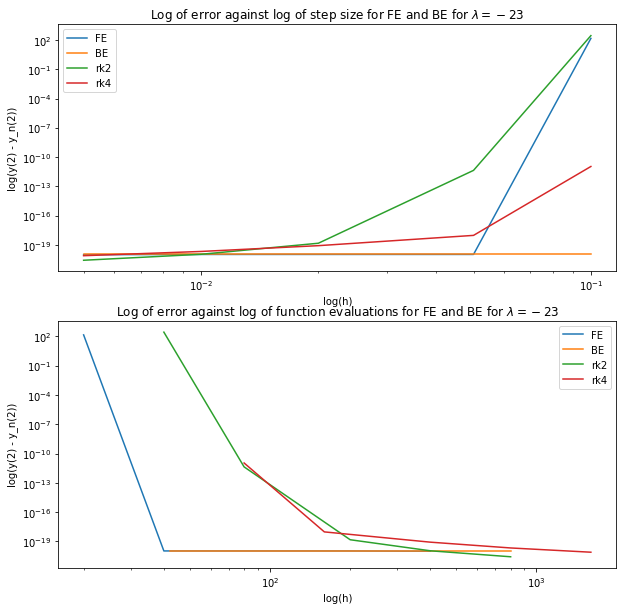

In [21]:
#now we need to make some graphical comparisions
#I'm going to have to use a lot more axes bc otherwise the graphs will be too busy
# one graph per eigenvalue
# I need sooo many lists
# I need lists for axes, output, colors, and labels, and lambda
# a) error vs step size, and error versus function evals, 2 evals each
# so 4 plots
fig, axs = plt.subplots(2,figsize=(10,10))
error_vs_h = np.zeros((4,5))
num_of_f_evals = np.zeros((4,5))
# first two rows for step sizes, next two for evals.
true_value = np.exp(-46)
for j in range(len(h_list)):
    (method_value,num_of_f_evals_fe) = FE(1,f,-23,h_list[j],2)
    (method_value_be, num_of_f_evals_be) = BE(1,f,df,-23,h_list[j],2)
    (method_value_rk2,num_of_f_evals_rk2) = rk2(1,f,-23,h_list[j],2)
    (method_value_rk4,num_of_f_evals_rk4) = rk4(1,f,-23,h_list[j],2)
    error_vs_h[0][j] = np.abs(true_value - method_value)
    error_vs_h[1][j] = np.abs(true_value - method_value_be)
    error_vs_h[2][j] = np.abs(true_value - method_value_rk2)
    error_vs_h[3][j] = np.abs(true_value - method_value_rk4)
    num_of_f_evals[0][j] = num_of_f_evals_fe
    num_of_f_evals[1][j] = num_of_f_evals_be
    num_of_f_evals[2][j] = num_of_f_evals_rk2
    num_of_f_evals[3][j] = num_of_f_evals_rk4

# now we have populated all our target arrays, and may plot
label_list=["FE","BE",'rk2','rk4']
for i in range(4):
    axs[0].loglog(h_list,error_vs_h[i][:],label=label_list[i])
axs[0].set_xlabel("log(h)")
axs[0].set_ylabel("log(y(2) - y_n(2))")
axs[0].set_title(r"Log of error against log of step size for FE and BE for $\lambda = -23$")
axs[0].legend()
        
for i in range(4):
    axs[1].loglog(num_of_f_evals[i][:],error_vs_h[i][:],label=label_list[i])
axs[1].set_xlabel("log(N)")
axs[1].set_ylabel("log(y(2) - y_n(2))")
axs[1].set_title(r"Log of error against log of function evaluations for FE and BE for $\lambda = -23$")
axs[1].legend()


Predictably, the Runge-Kutta methods require more function evaluations, though in exchange they do perform well, especially the 4-stage method. However, at small step-sizes BE still seems to be superior. In the next cell, we repeat the above for $\lambda = 1$

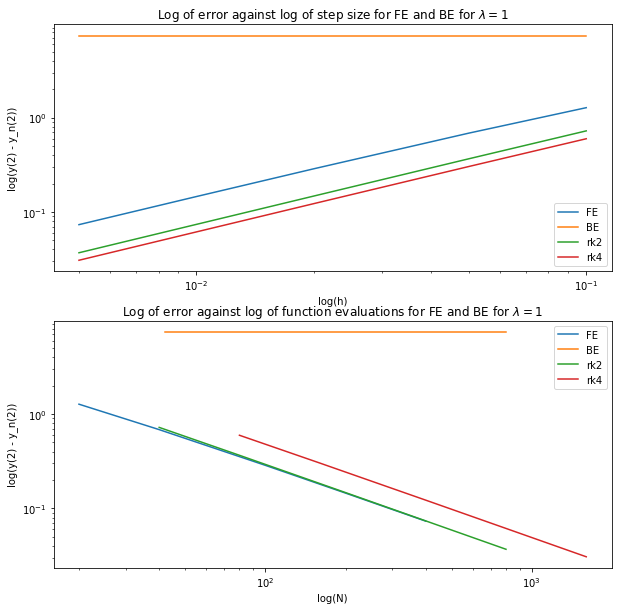

In [24]:
fig, axs = plt.subplots(2,figsize=(10,10))
error_vs_h = np.zeros((4,5))
num_of_f_evals = np.zeros((4,5))
# first two rows for step sizes, next two for evals.
true_value = np.exp(2*1)
for j in range(len(h_list)):
    (method_value,num_of_f_evals_fe) = FE(1,f,1,h_list[j],2)
    (method_value_be, num_of_f_evals_be) = BE(1,f,df,1,h_list[j],2)
    (method_value_rk2,num_of_f_evals_rk2) = rk2(1,f,1,h_list[j],2)
    (method_value_rk4,num_of_f_evals_rk4) = rk4(1,f,1,h_list[j],2)
    error_vs_h[0][j] = np.abs(true_value - method_value)
    error_vs_h[1][j] = np.abs(true_value - method_value_be)
    error_vs_h[2][j] = np.abs(true_value - method_value_rk2)
    error_vs_h[3][j] = np.abs(true_value - method_value_rk4)
    num_of_f_evals[0][j] = num_of_f_evals_fe
    num_of_f_evals[1][j] = num_of_f_evals_be
    num_of_f_evals[2][j] = num_of_f_evals_rk2
    num_of_f_evals[3][j] = num_of_f_evals_rk4

# now we have populated all our target arrays, and may plot
label_list=["FE","BE",'rk2','rk4']
for i in range(4):
    axs[0].loglog(h_list,error_vs_h[i][:],label=label_list[i])
axs[0].set_xlabel("log(h)")
axs[0].set_ylabel("log(y(2) - y_n(2))")
axs[0].set_title(r"Log of error against log of step size for FE and BE for $\lambda = 1$")
axs[0].legend()
        
for i in range(4):
    axs[1].loglog(num_of_f_evals[i][:],error_vs_h[i][:],label=label_list[i])
axs[1].set_xlabel("log(N)")
axs[1].set_ylabel("log(y(2) - y_n(2))")
axs[1].set_title(r"Log of error against log of function evaluations for FE and BE for $\lambda = 1$")
axs[1].legend()


In this case, BE actually has the worst performance. Though from theory we know this method should perform well in most cases, which suggests a flaw in the implementation of the solver. We now turn to comparing the performance of the methods over time.

Text(0.5, 1.0, 'Superimposed solutions of true values, FE, BE for h=0.02')

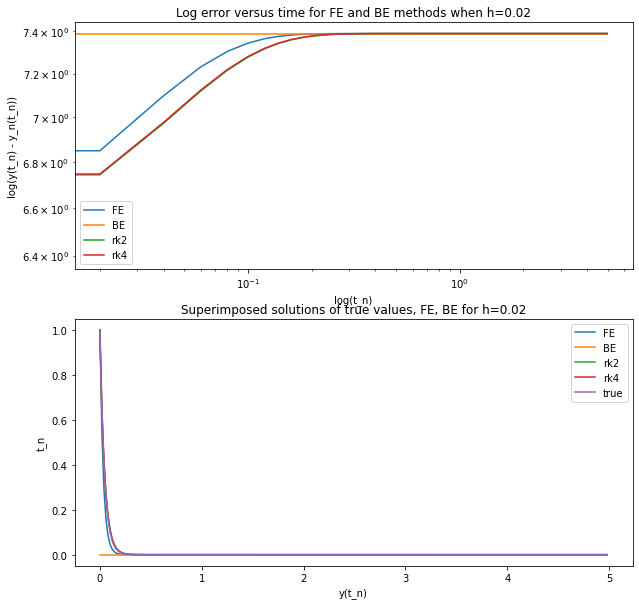

In [40]:
fig,(ax1,ax2) = plt.subplots(2,figsize=(10,10))

time_steps = np.arange(0,5,0.02)
#array hellscape
error_vs_time = np.zeros((4,len(time_steps)))
true_values = np.exp(-23*time_steps)
method_values = np.zeros((4,len(time_steps)))


method_values[0] = FE(1,f,-23,0.02,5,verbose=True)
method_values[1] = BE(1,f,df,-23,0.02,5,verbose=True)
method_values[2] = rk2(1,f,-23,0.02,5,verbose=True)
method_values[3] = rk4(1,f,-23,0.02,5,verbose=True)
error_vs_time[0][:] = np.abs(true_value - method_values[0])
error_vs_time[1][:] = np.abs(true_value -method_values[1])
error_vs_time[2][:] = np.abs(true_value - method_values[2])
error_vs_time[3][:] = np.abs(true_value - method_values[3])

for i in range(4):
    ax1.loglog(time_steps,error_vs_time[i][:],label=label_list[i])
ax1.set_xlabel("log(t_n)")
ax1.set_ylabel("log(y(t_n) - y_n(t_n))")
ax1.legend()
ax1.set_title("Log error versus time for FE and BE methods when h=0.02")

for i in range(4):
    ax2.plot(time_steps,method_values[i][:],label=label_list[i])
ax2.plot(time_steps,true_values,label="true")
ax2.set_xlabel("y(t_n)")
ax2.set_ylabel("t_n")
ax2.legend()
ax2.set_title("Superimposed solutions of true values, FE, BE for h=0.02")

From this we see that we get the best performance from the Runge-Kutta methods, and also a hint that our BE method is not working properly. Now to repeat for $\lambda = 1$

Text(0.5, 1.0, 'Superimposed solutions of true values, FE, BE for h=0.02')

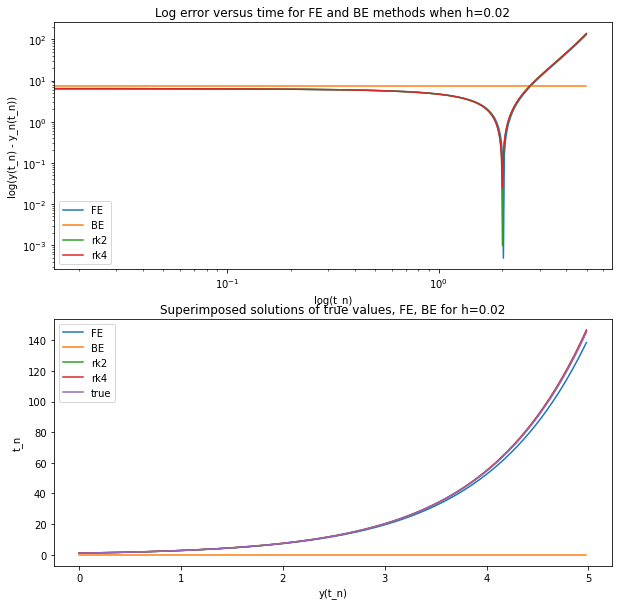

In [43]:
fig,(ax1,ax2) = plt.subplots(2,figsize=(10,10))

time_steps = np.arange(0,5,0.02)
#array hellscape
error_vs_time = np.zeros((4,len(time_steps)))
true_values = np.exp(1*time_steps)
method_values = np.zeros((4,len(time_steps)))


method_values[0] = FE(1,f,1,0.02,5,verbose=True)
method_values[1] = BE(1,f,df,1,0.02,5,verbose=True)
method_values[2] = rk2(1,f,1,0.02,5,verbose=True)
method_values[3] = rk4(1,f,1,0.02,5,verbose=True)
error_vs_time[0][:] = np.abs(true_value - method_values[0])
error_vs_time[1][:] = np.abs(true_value -method_values[1])
error_vs_time[2][:] = np.abs(true_value - method_values[2])
error_vs_time[3][:] = np.abs(true_value - method_values[3])

for i in range(4):
    ax1.loglog(time_steps,error_vs_time[i][:],label=label_list[i])
ax1.set_xlabel("log(t_n)")
ax1.set_ylabel("log(y(t_n) - y_n(t_n))")
ax1.legend()
ax1.set_title("Log error versus time for FE and BE methods when h=0.02")

for i in range(4):
    ax2.plot(time_steps,method_values[i][:],label=label_list[i])
ax2.plot(time_steps,true_values,label="true")
ax2.set_xlabel("y(t_n)")
ax2.set_ylabel("t_n")
ax2.legend()
ax2.set_title("Superimposed solutions of true values, FE, BE for h=0.02")

The dip in error for all method except BE is really interesting, and I'm unsure why that's happening. It call for further experimentation. My BE implementation definitely needs to be fixed. Currently one might think that rk2 is the superior method, however, let's show off the stability or lack thereof of these methods, and consider $\lambda = -100$.

Text(0.5, 1.0, 'Superimposed solutions of true values, FE, BE for h=0.02')

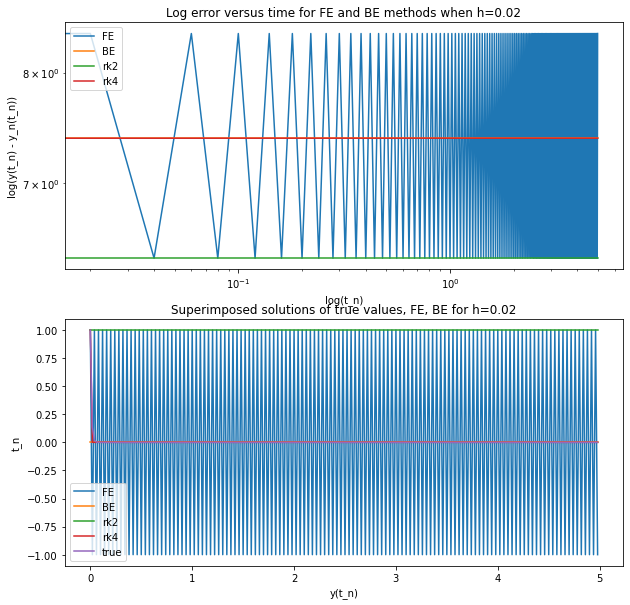

In [44]:
fig,(ax1,ax2) = plt.subplots(2,figsize=(10,10))

time_steps = np.arange(0,5,0.02)
#array hellscape
error_vs_time = np.zeros((4,len(time_steps)))
true_values = np.exp(-100*time_steps)
method_values = np.zeros((4,len(time_steps)))


method_values[0] = FE(1,f,-100,0.02,5,verbose=True)
method_values[1] = BE(1,f,df,-100,0.02,5,verbose=True)
method_values[2] = rk2(1,f,-100,0.02,5,verbose=True)
method_values[3] = rk4(1,f,-100,0.02,5,verbose=True)
error_vs_time[0][:] = np.abs(true_value - method_values[0])
error_vs_time[1][:] = np.abs(true_value -method_values[1])
error_vs_time[2][:] = np.abs(true_value - method_values[2])
error_vs_time[3][:] = np.abs(true_value - method_values[3])

for i in range(4):
    ax1.loglog(time_steps,error_vs_time[i][:],label=label_list[i])
ax1.set_xlabel("log(t_n)")
ax1.set_ylabel("log(y(t_n) - y_n(t_n))")
ax1.legend()
ax1.set_title("Log error versus time for FE and BE methods when h=0.02")

for i in range(4):
    ax2.plot(time_steps,method_values[i][:],label=label_list[i])
ax2.plot(time_steps,true_values,label="true")
ax2.set_xlabel("y(t_n)")
ax2.set_ylabel("t_n")
ax2.legend()
ax2.set_title("Superimposed solutions of true values, FE, BE for h=0.02")

Here we can really see the instability of both FE and rk2 manifest, suggesting that rk4 is the superior method.